Figure set up
done with rho plot in  22.057425022125244  seconds
done with mag plot in  28.24750304222107  seconds
done with beta plot in  26.571640729904175  seconds
done with betabar plot in  27.593127250671387  seconds
done with stress plot in  27.490039587020874  seconds
done with alpha plot in  27.72890591621399  seconds
done
Run time is  159.75256967544556  seconds


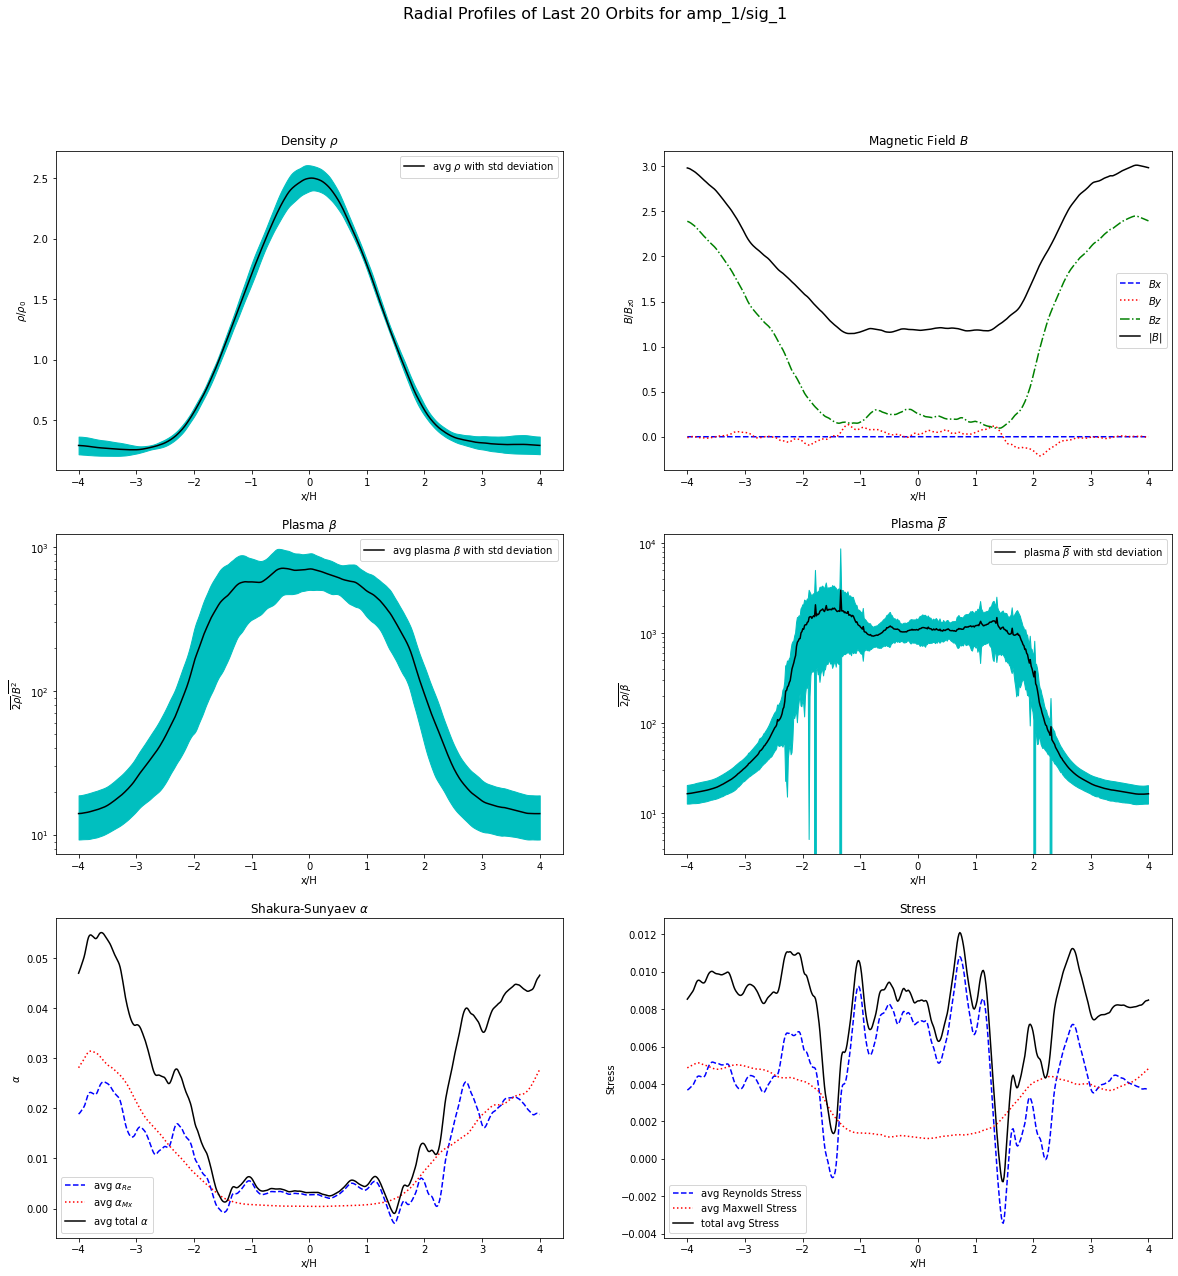

In [1]:
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)

file_path = './ad_prof/amp_1/sig_1'


def complete_profiles(file_path):
    #figure setup---------------------------------------------------------------
    fig,ax = plt.subplots(3,2)
    fig.set_size_inches(20,20)
    x_arr = np.linspace(-4,4,512)
    sptitle = 'Radial Profiles of Last 20 Orbits for '+file_path[10:]
    fig.suptitle(sptitle,fontsize=16)

    print('Figure set up')
    #rho plot -----------------------------------------------------------------
    rho_time = time.time()
    prof_rho,err_rho = cmp.avg_rho_prof(file_path)
    ax[0,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with std deviation')
    ax[0,0].fill_between(x_arr,prof_rho-err_rho,prof_rho+err_rho,color ='c')
    ax[0,0].legend()
    ax[0,0].set_xlabel('x/H')
    ax[0,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$'
    ax[0,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
    #magnetic plot------------------------------------------------------------------------
    mag_time = time.time()
    #Bz0 as set by initial plasma beta
    Bz0 = np.sqrt(2)/20
    prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_mag_prof(file_path)
    ax[0,1].plot(x_arr,prof_bx/Bz0,'b--',label ='$Bx$')
    ax[0,1].plot(x_arr,prof_by/Bz0,'r:',label ='$By$')
    ax[0,1].plot(x_arr,prof_bz/Bz0,'g-.',label ='$Bz$')
    ax[0,1].plot(x_arr,prof_bmag/Bz0,'k',label ='$|B|$')
    ax[0,1].legend()
    ax[0,1].set_xlabel('x/H')
    ax[0,1].set_ylabel('$B/B_{z0}$')
    subtitle = 'Magnetic Field $B$'
    ax[0,1].set_title(subtitle)
    print('done with mag plot in ',(time.time()-mag_time),' seconds')
    
    
    
    #Beta plot-------------------------------------------------------------------
    beta_time = time.time()
    prof_beta,err_beta = cmp.avg_beta_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,0].semilogy(x_arr,prof_beta,'k',label='avg plasma $\\beta$ with std deviation')
    ax[1,0].fill_between(x_arr,(prof_beta-err_beta),(prof_beta+err_beta),color ='c')
    ax[1,0].legend()
    ax[1,0].set_xlabel('x/H')
    ax[1,0].set_ylabel('$\\overline{2\\rho}/\\overline{B^2}$')
    subtitle = 'Plasma $\\beta$'
    ax[1,0].set_title(subtitle)
    print('done with beta plot in ',(time.time()-beta_time),' seconds')
    
    #betabar plot--------------------------------------------------------------------
    
    betabar_time = time.time()
    prof_betabar,err_betabar = cmp.avg_betabar_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,1].semilogy(x_arr,prof_betabar,'k',label='plasma $\\overline{\\beta}$ with std deviation')
    ax[1,1].fill_between(x_arr,(prof_betabar-err_betabar),(prof_betabar+err_betabar),color ='c')
    ax[1,1].legend()
    ax[1,1].set_xlabel('x/H')
    ax[1,1].set_ylabel('$\\overline{2\\rho/\\beta}$')
    subtitle = 'Plasma $\\overline{\\beta}$'
    ax[1,1].set_title(subtitle)
    print('done with betabar plot in ',(time.time()-betabar_time),' seconds')
    
    #stress plot-----------------------------------------------------------------
    stress_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
    ax[2,1].plot(x_arr,prof_avg_reyn,'b--',label='avg Reynolds Stress')
    ax[2,1].plot(x_arr,prof_avg_maxw,'r:',label='avg Maxwell Stress')
    ax[2,1].plot(x_arr,(prof_avg_tot),'k',label='total avg Stress')
    ax[2,1].legend()
    ax[2,1].set_xlabel('x/H')
    ax[2,1].set_ylabel('Stress')
    subtitle = 'Stress'
    ax[2,1].set_title(subtitle)   
    print('done with stress plot in ',(time.time()-stress_time),' seconds')


    #Alpha plot-----------------------------------------------------------------
    alpha_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
    ax[2,0].plot(x_arr,prof_avg_reyn,'b--',label='avg $\\alpha_{Re}$')
    ax[2,0].plot(x_arr,prof_avg_maxw,'r:',label='avg $\\alpha_{Mx}$')
    ax[2,0].plot(x_arr,(prof_avg_tot),'k',label='avg total $\\alpha$')
    ax[2,0].legend()
    ax[2,0].set_xlabel('x/H')
    ax[2,0].set_ylabel('$\\alpha$')
    subtitle = 'Shakura-Sunyaev $\\alpha$'
    ax[2,0].set_title(subtitle)
    print('done with alpha plot in ',(time.time()-alpha_time),' seconds')
    
    ans = 'done'

    return ans
    
print(complete_profiles(file_path))    
print('Run time is ',(time.time()-start),' seconds' )

Figure set up
done with rho plot in  22.626328945159912  seconds
done with mag plot in  28.637773275375366  seconds
done with beta plot in  26.97035789489746  seconds
done with betabar plot in  28.4123477935791  seconds
done with stress plot in  26.604475498199463  seconds
done with alpha plot in  26.289433240890503  seconds
done


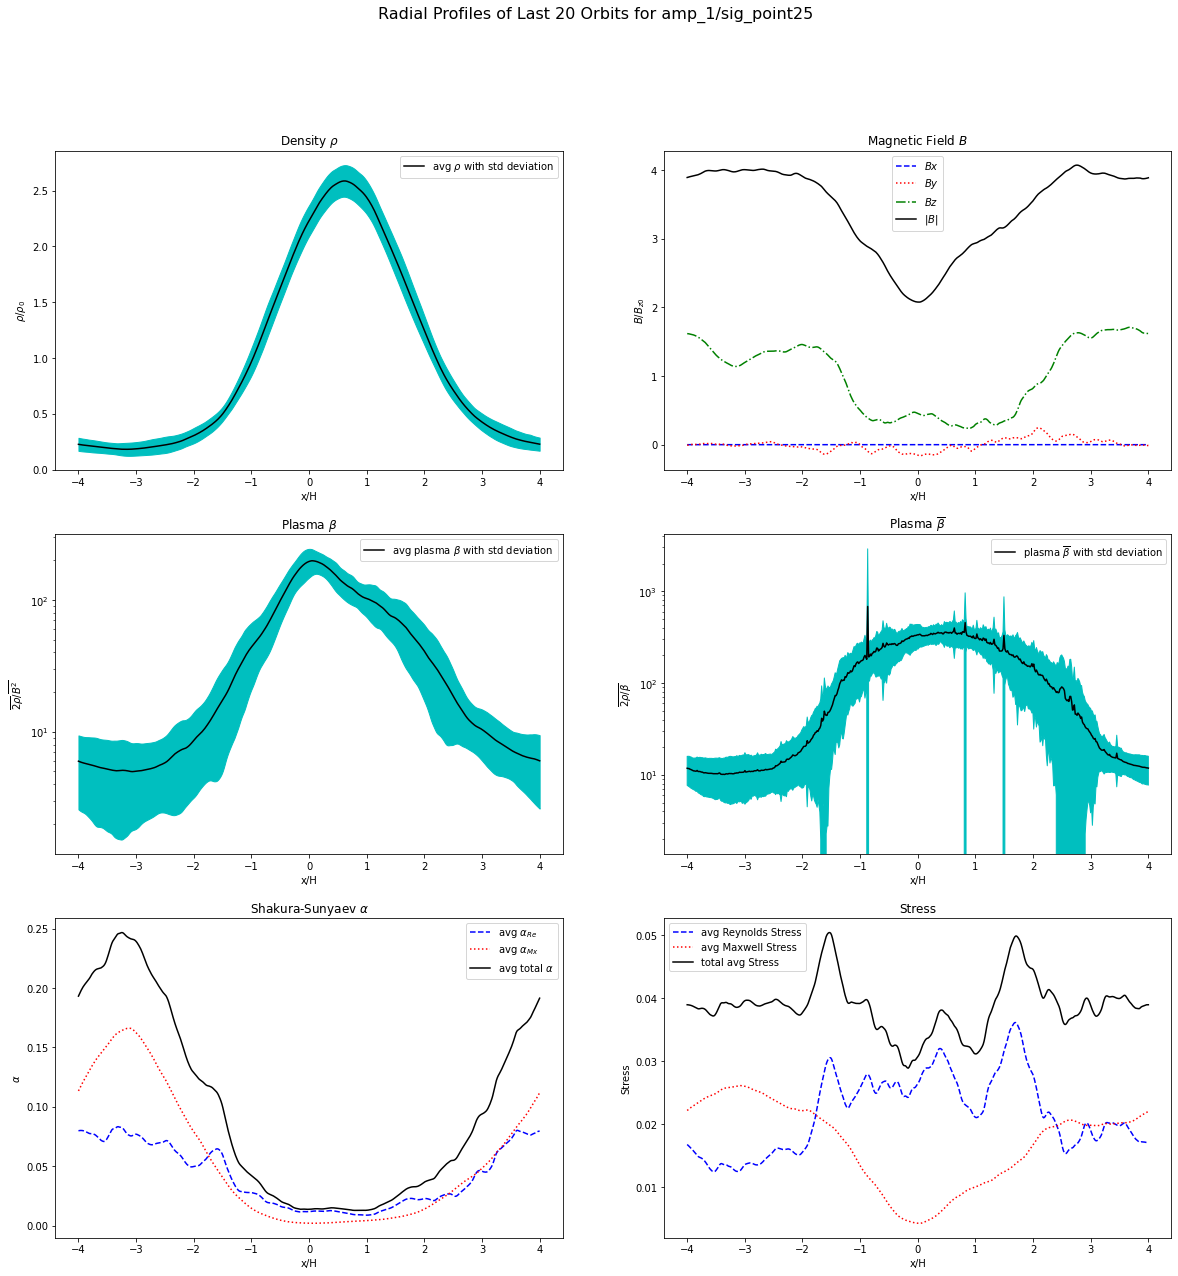

Figure set up
done with rho plot in  22.581763982772827  seconds
done with mag plot in  28.711819648742676  seconds
done with beta plot in  27.42065668106079  seconds
done with betabar plot in  29.0499370098114  seconds
done with stress plot in  27.35788631439209  seconds
done with alpha plot in  27.344232320785522  seconds
done


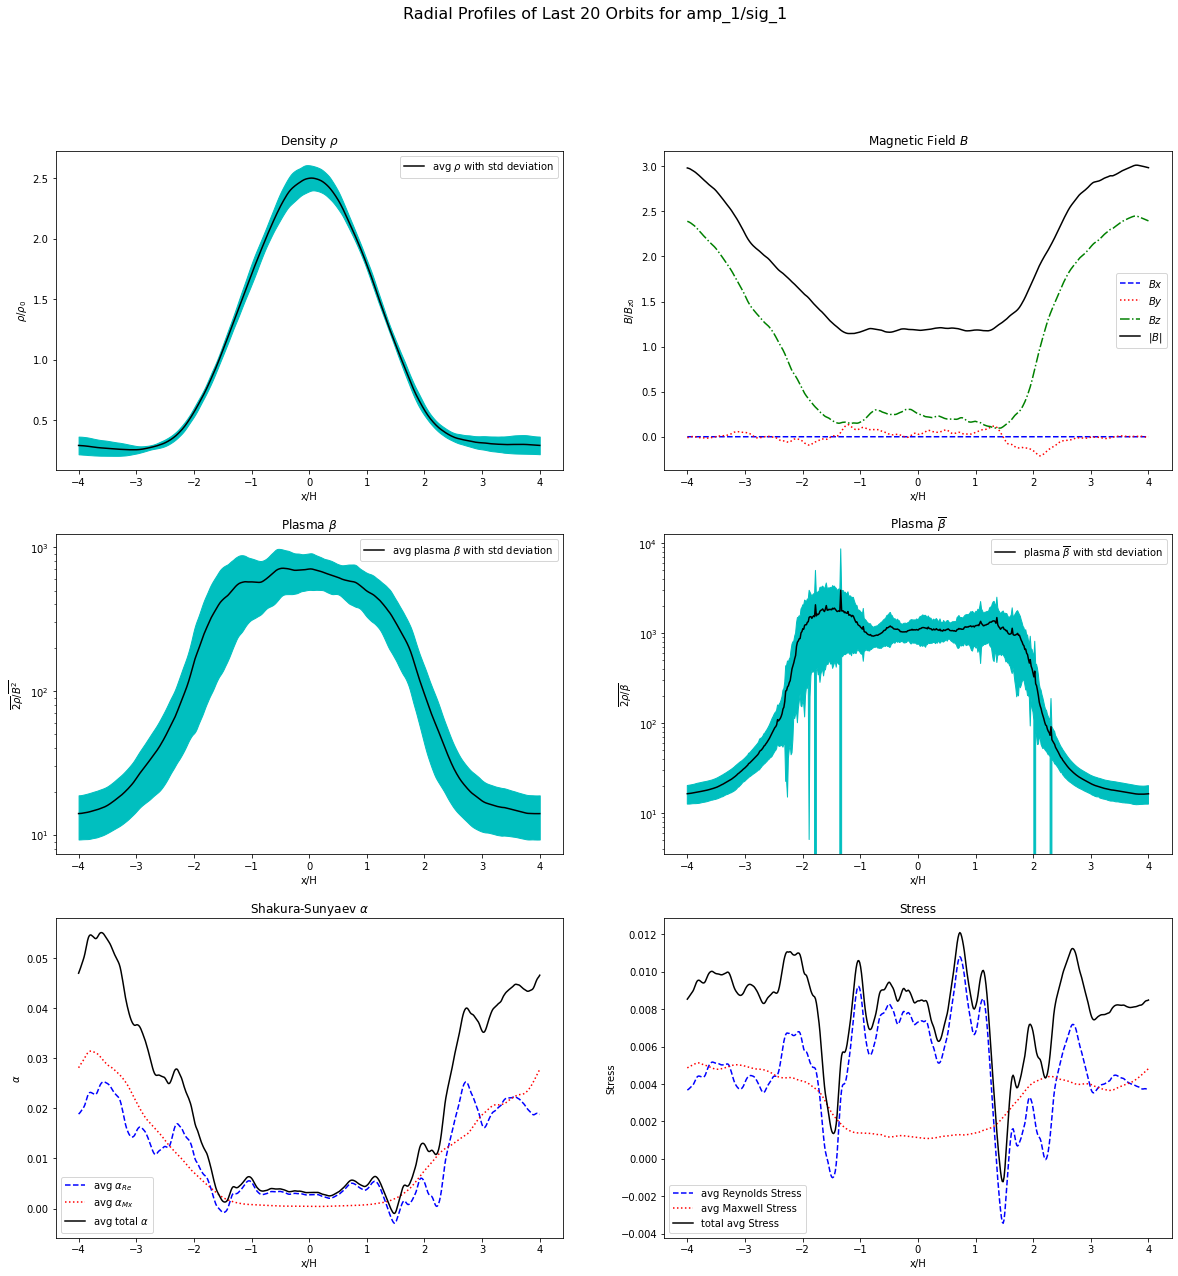

Figure set up
done with rho plot in  30.946777820587158  seconds
done with mag plot in  28.58897113800049  seconds
done with beta plot in  27.58420491218567  seconds
done with betabar plot in  29.466113805770874  seconds
done with stress plot in  27.906779527664185  seconds
done with alpha plot in  28.278562784194946  seconds
done


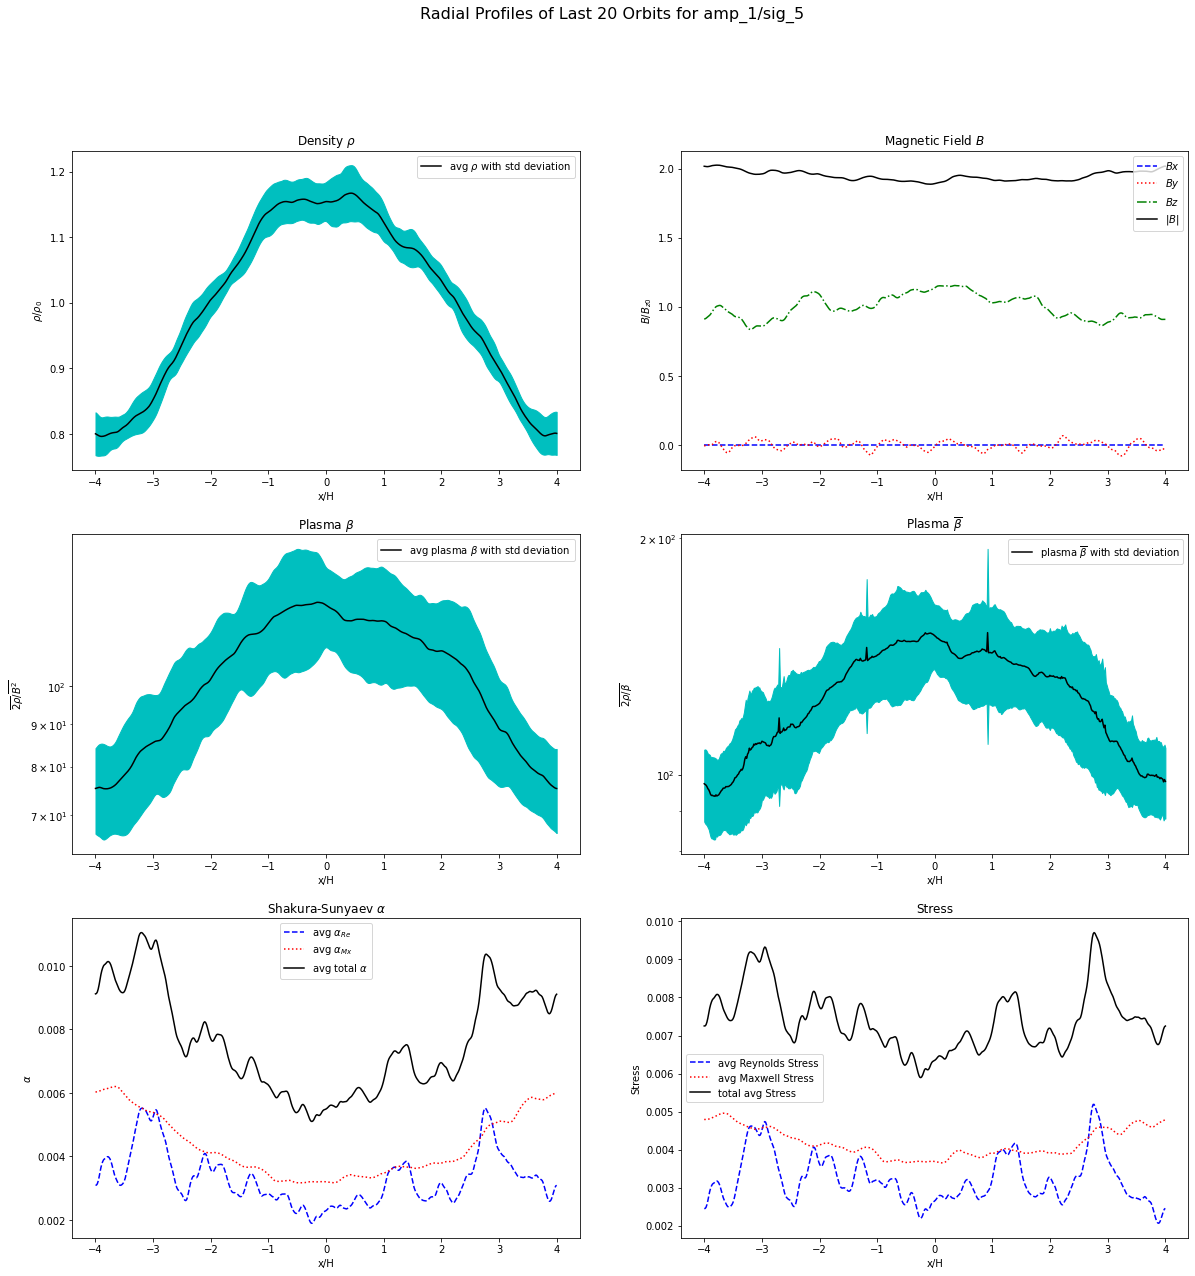

Figure set up
done with rho plot in  66.56114411354065  seconds
done with mag plot in  29.25915765762329  seconds
done with beta plot in  27.480058431625366  seconds
done with betabar plot in  28.808598518371582  seconds
done with stress plot in  27.96424150466919  seconds
done with alpha plot in  27.851969003677368  seconds
done


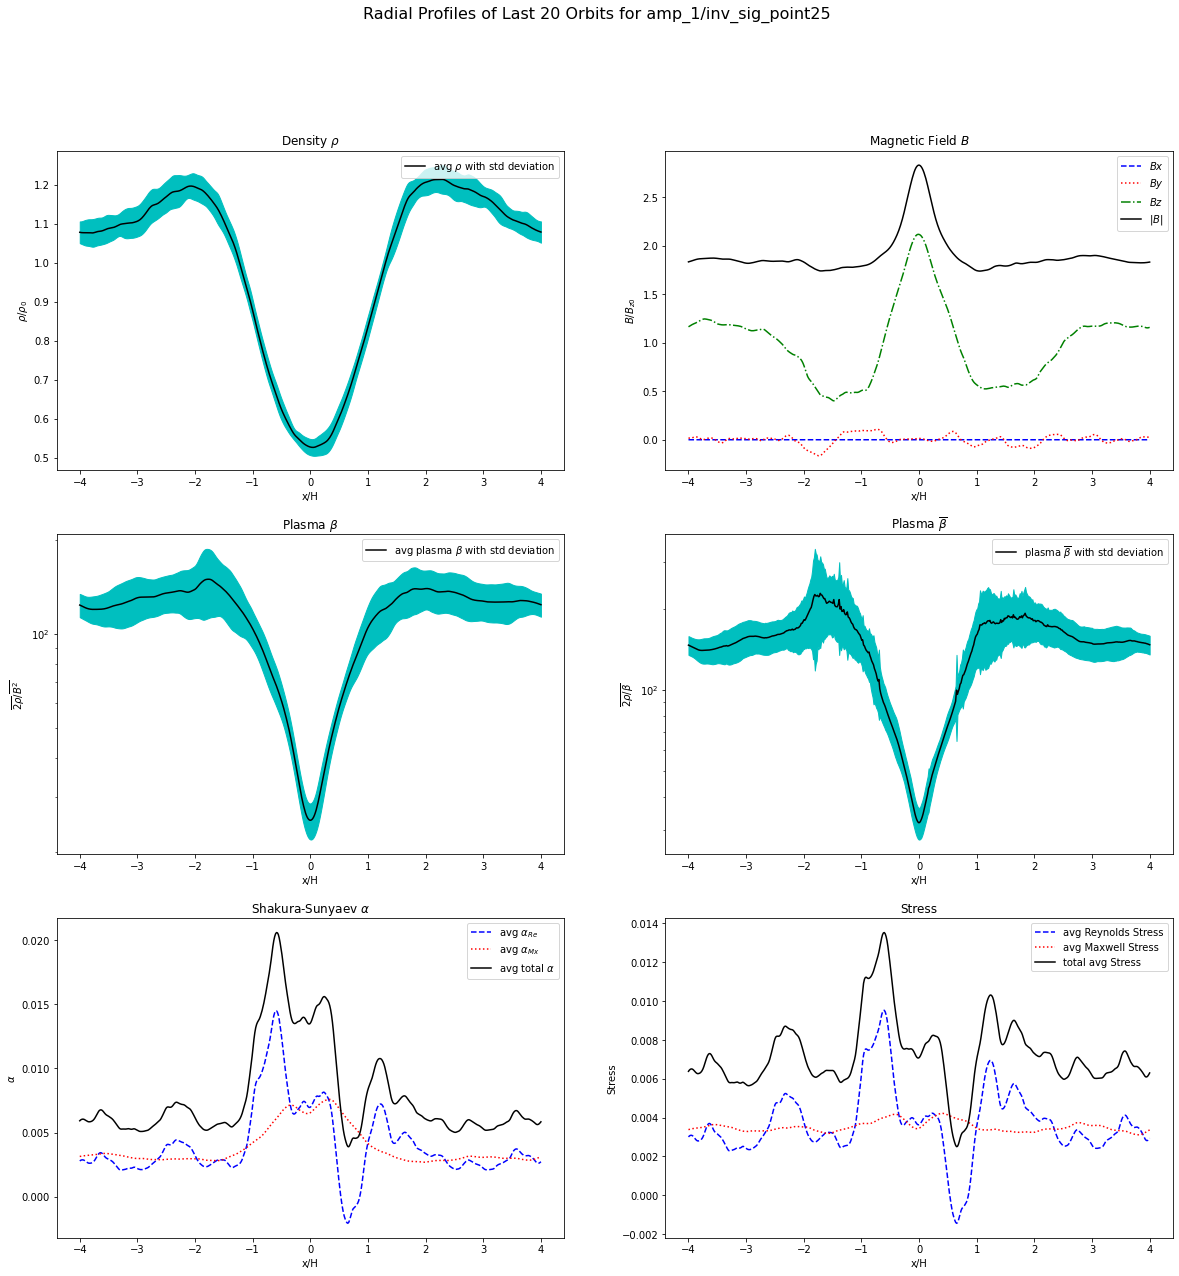

Figure set up
done with rho plot in  68.31991696357727  seconds
done with mag plot in  29.18910813331604  seconds
done with beta plot in  27.5822434425354  seconds
done with betabar plot in  29.060304164886475  seconds
done with stress plot in  28.570056438446045  seconds
done with alpha plot in  27.725573778152466  seconds
done


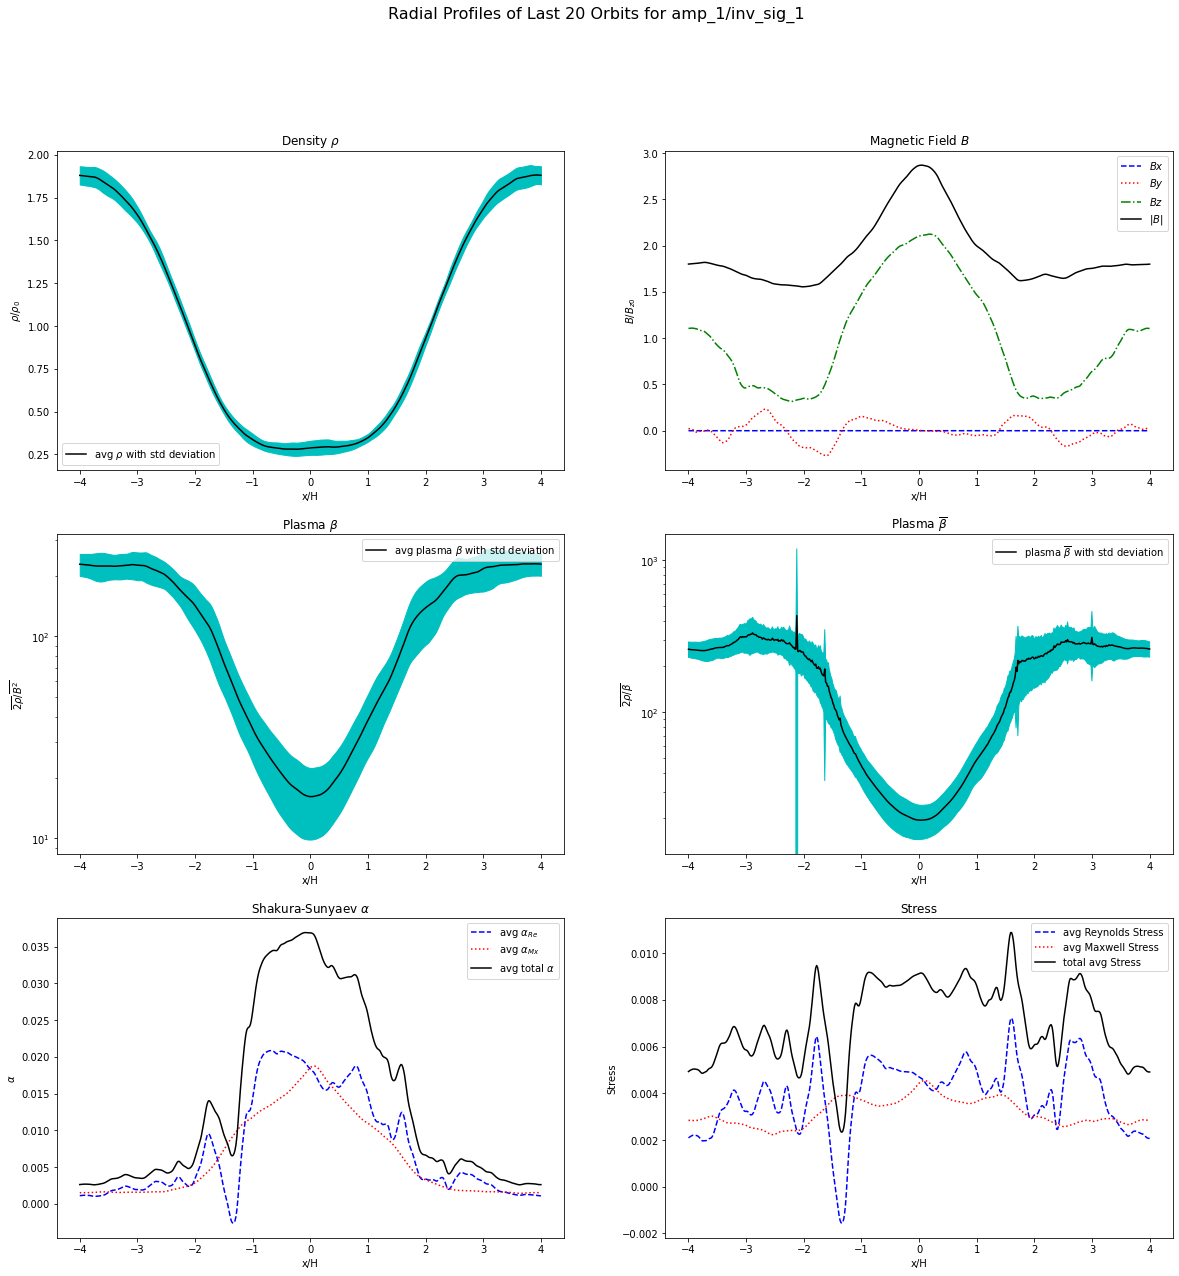

Figure set up
done with rho plot in  67.01403021812439  seconds
done with mag plot in  30.565629720687866  seconds
done with beta plot in  28.562015056610107  seconds
done with betabar plot in  29.82198977470398  seconds
done with stress plot in  28.20777153968811  seconds
done with alpha plot in  28.076585054397583  seconds
done


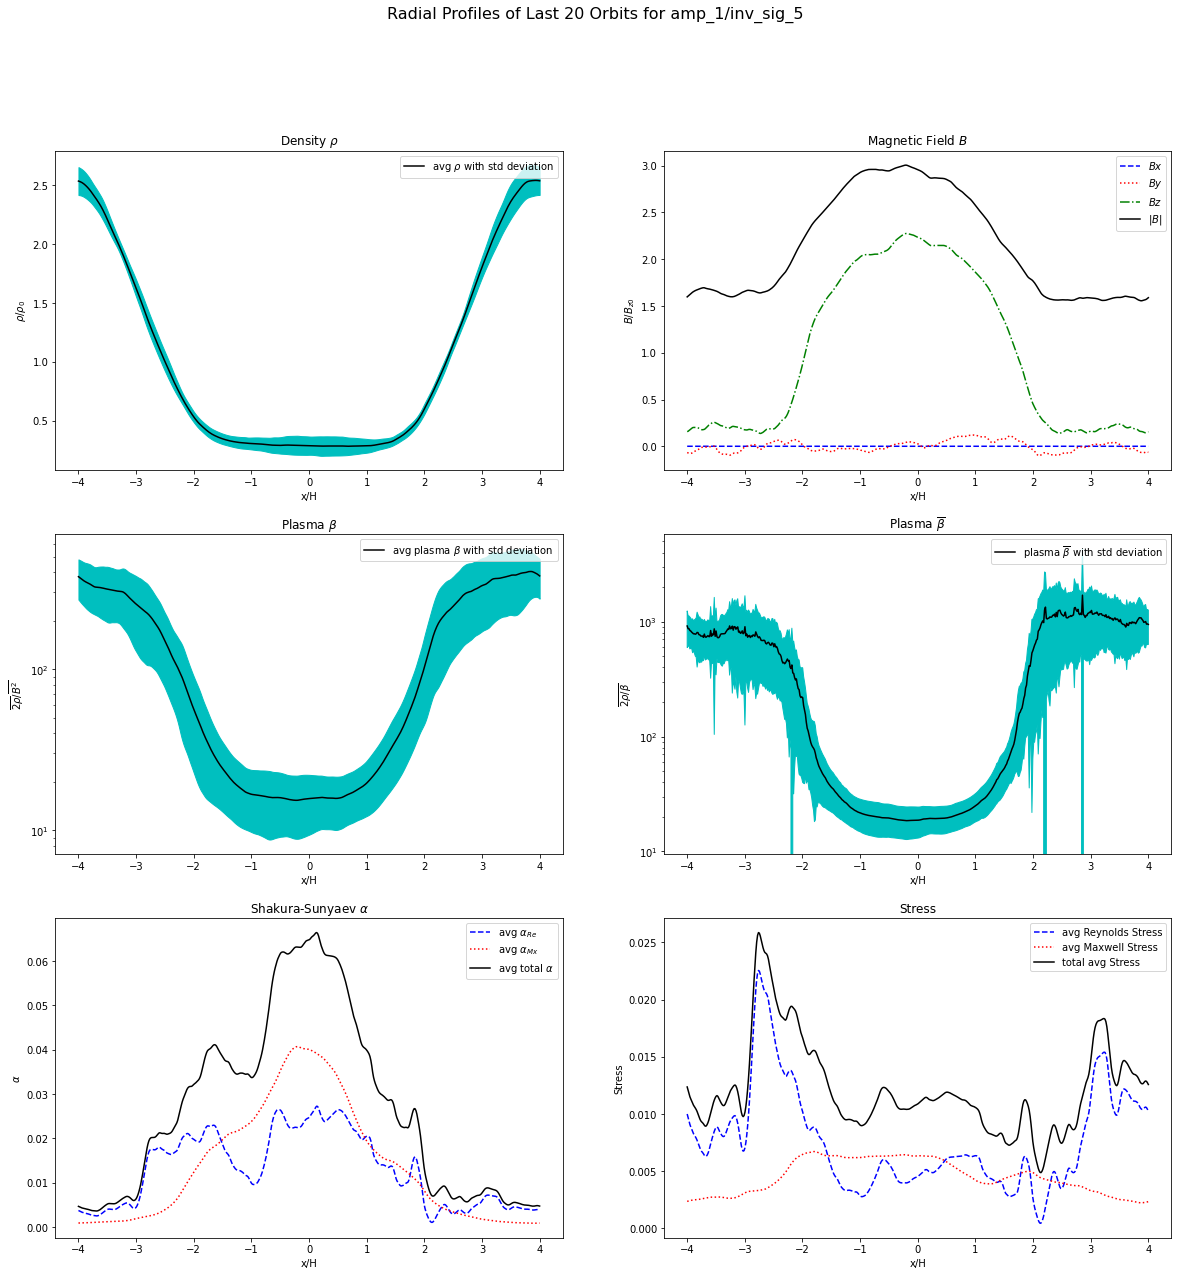

total run time is  1131.3796253204346  seconds


In [4]:
from matplotlib import pylab as plt
file_list = [
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5"]
start = time.time()
for fname in file_list:
    print(complete_profiles(fname))
    plt.show()
print('total run time is ',(time.time()-start),' seconds')